## **Industrial Automation - Energy Efficiency**

**Problem Statement:**
> The effect of eight input variables (relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, glazing area distribution) on two output variables, namely heating load (HL) and cooling load (CL), of residential buildings is investigated using a statistical machine learning framework. We have to use a number of classical and non-parametric statistical analytic tools to carefully analyze the strength of each input variable's correlation with each of the output variables in order to discover the most strongly associated input variables. We need to estimate HL and CL, we can compare a traditional linear regression approach to a sophisticated state-of-the-art nonlinear non-parametric method, random forests.

**Data Set Information:**
> We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain
768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

**Attribute Information:**
> The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

**Specifically:**
* X1 Relative Compactness
* X2 Surface Area
* X3 Wall Area
* X4 Roof Area
* X5 Overall Height
* X6 Orientation
* X7 Glazing Area
* X8 Glazing Area Distribution
* y1 Heating Load - Target
* y2 Cooling Load - Target

In [29]:
# Importing Dependencies

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [30]:
# Reading data

df = pd.read_csv('/content/ENB2012_data.xlsx - Φύλλο1.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [31]:
# Renaming columns for better readability

df = df.rename(columns=({'X1':'Relative_Compactness', 'X2':'Surface_Area','X3':'Wall_Area','X4':'Roof_Area',
                   'X5':'Overall_Height','X6':'Orientation','X7':'Glazing_Area','X8':'Glazing_Area_Distribution',
                   'Y1':'Heating_Load-Target','Y2':'Cooling_Load-Target'}))
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load-Target,Cooling_Load-Target
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [32]:
# Feature Engineering

# Surface_Area i.e. Total = Roof_Area + Floor_Area + Wall_Area
df['Floor_Area'] = df['Surface_Area']-(df['Wall_Area']+df['Roof_Area'])
df = df[['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Floor_Area','Overall_Height','Orientation','Glazing_Area','Glazing_Area_Distribution','Heating_Load-Target','Cooling_Load-Target']]
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Floor_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load-Target,Cooling_Load-Target
0,0.98,514.5,294.0,110.25,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,220.50,3.5,4,0.4,5,16.48,16.61


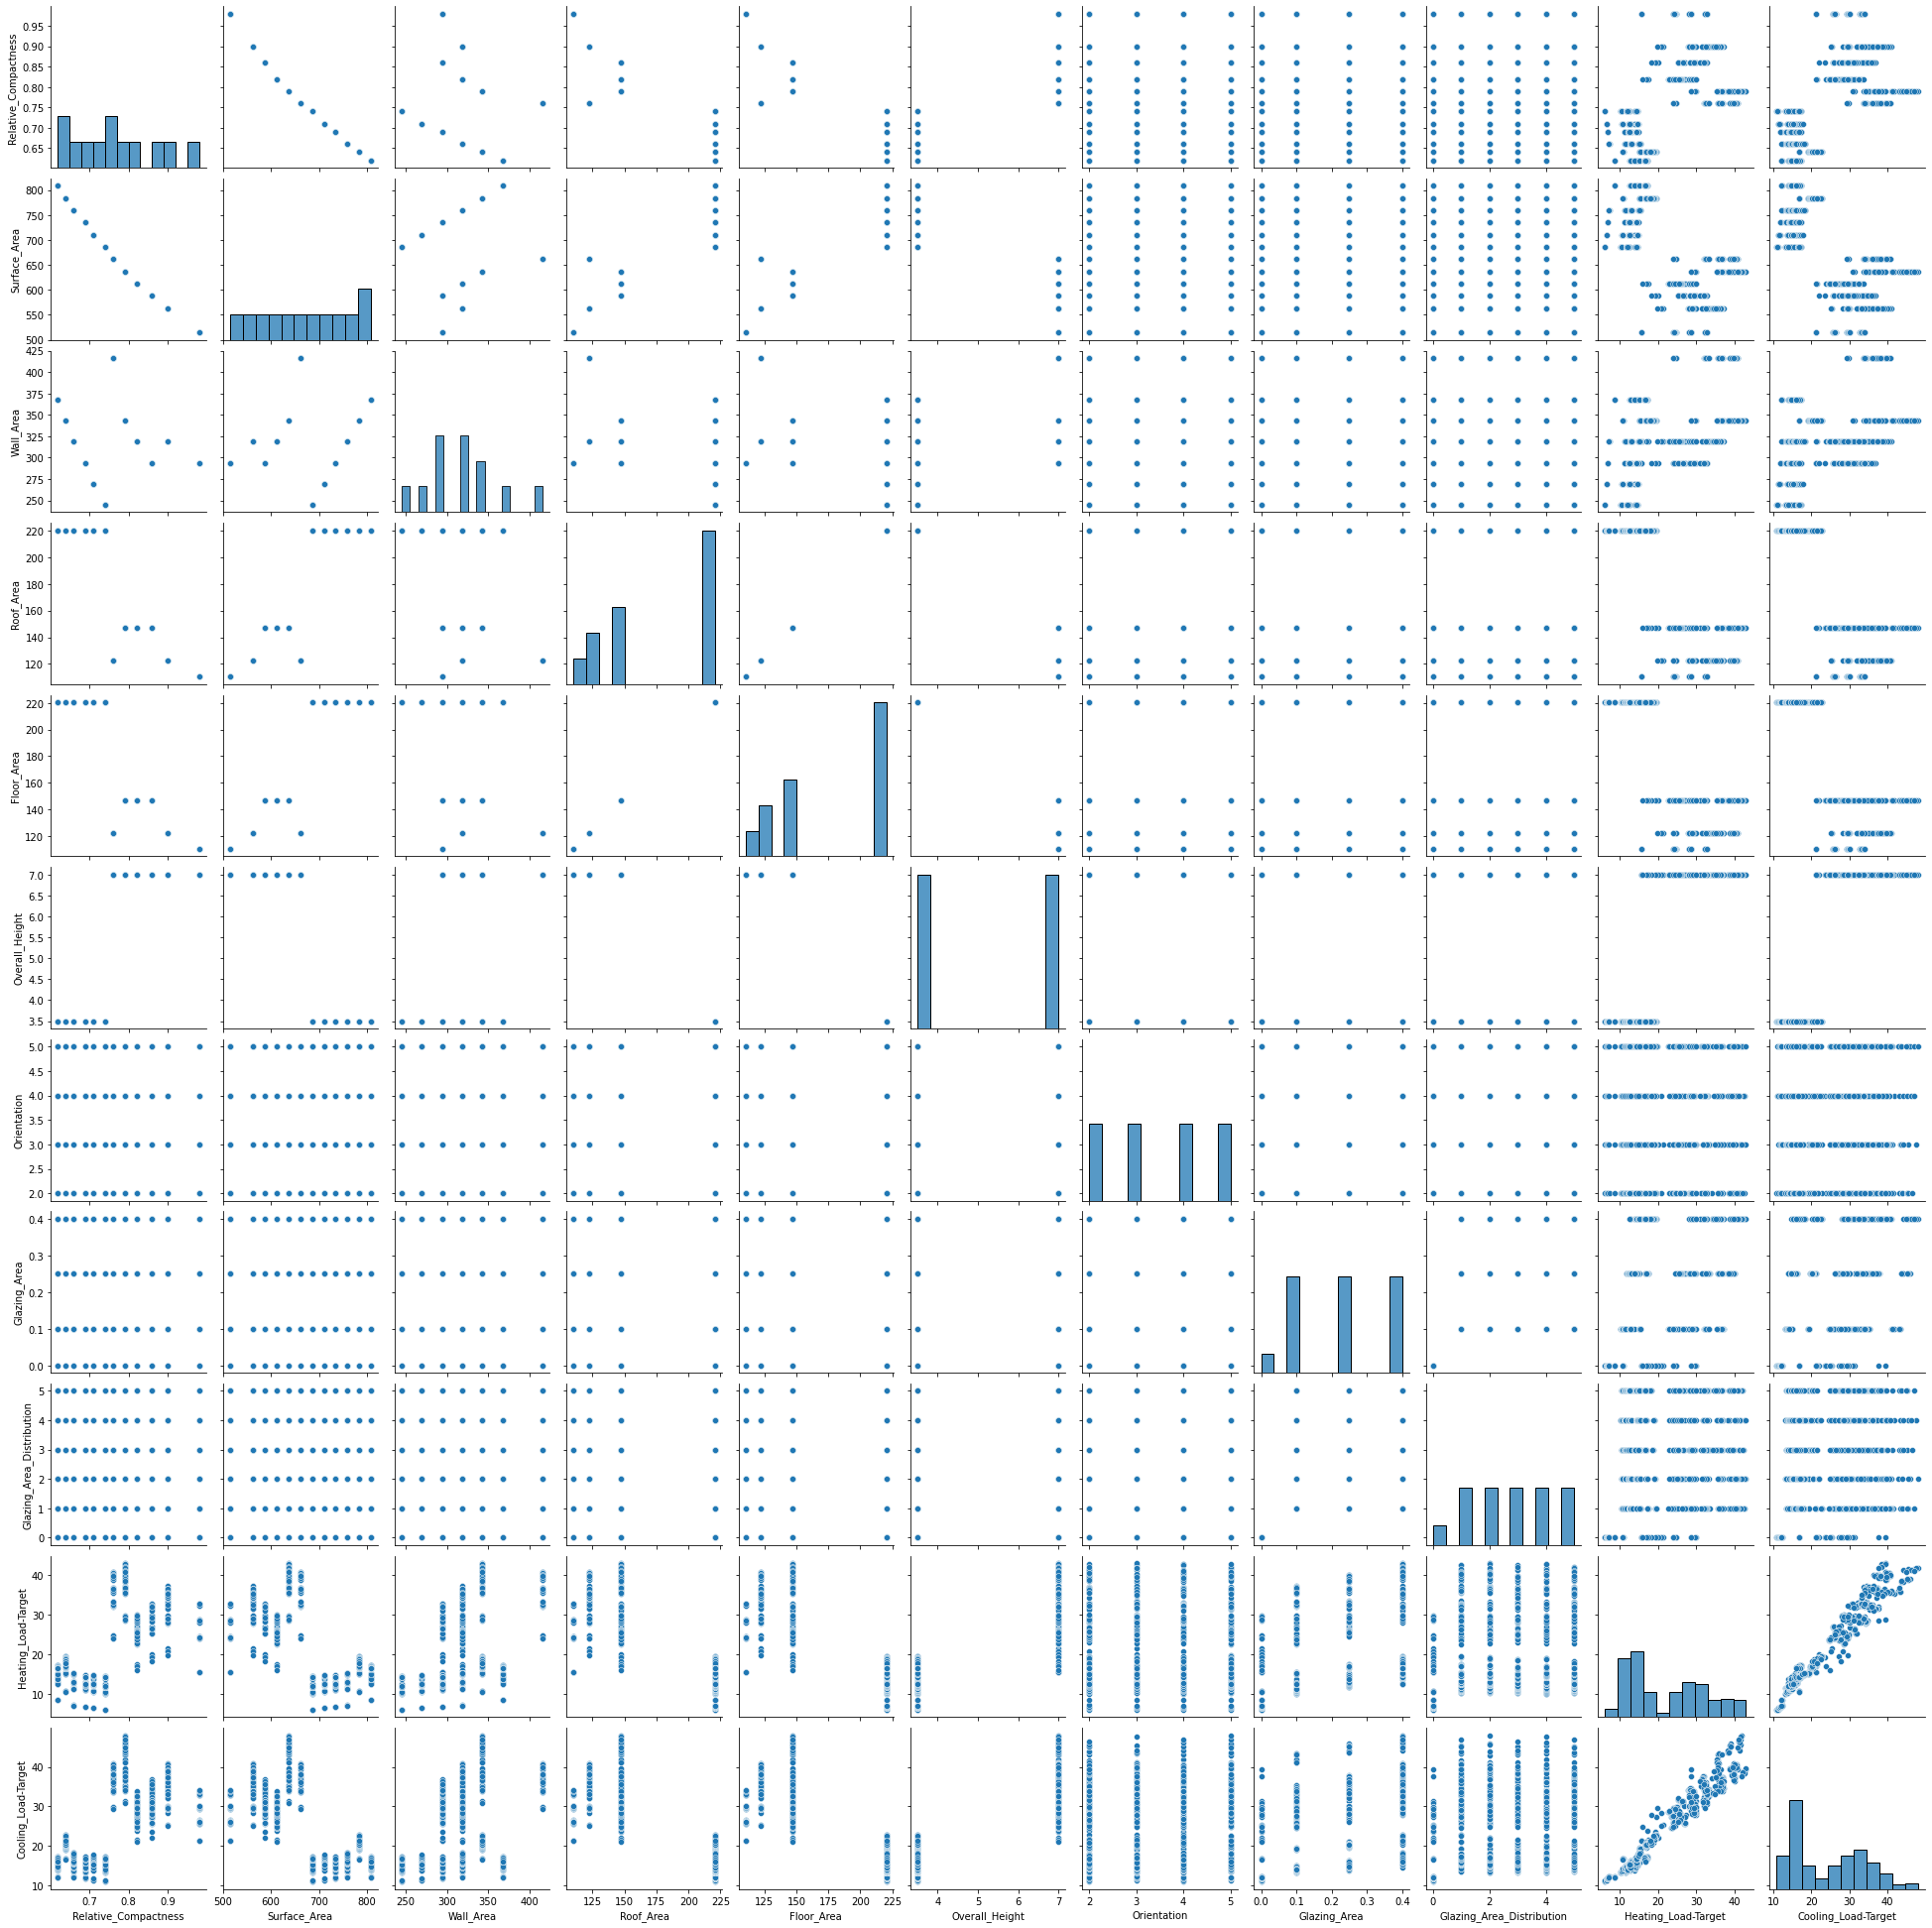

In [33]:
# pair plot

sns.pairplot(df)
plt.show()

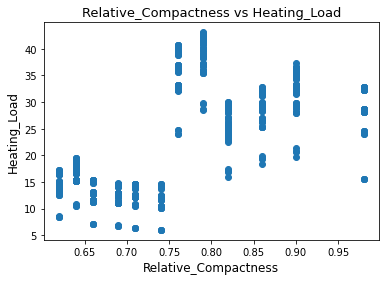

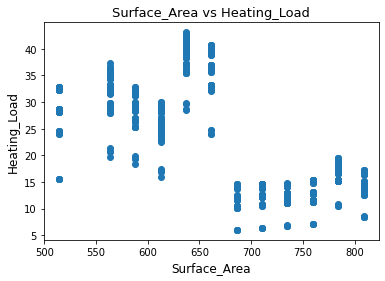

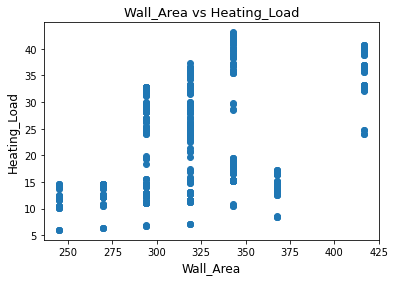

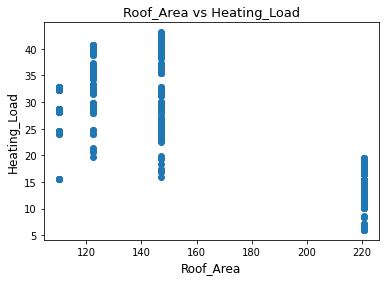

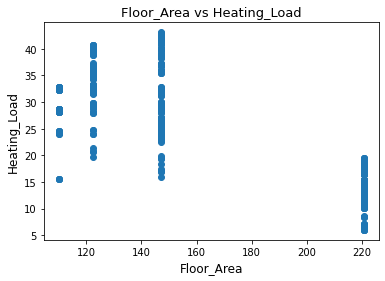

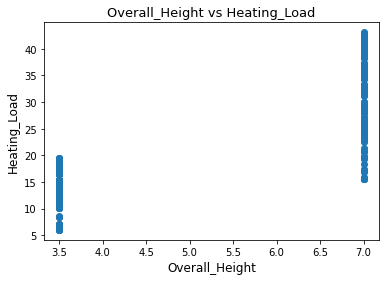

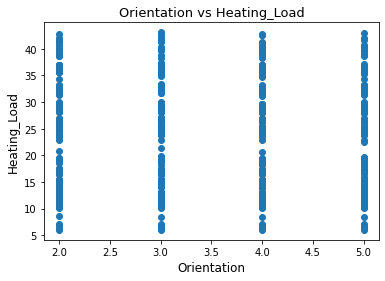

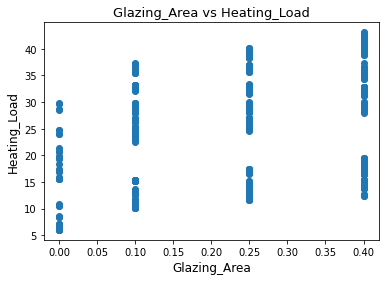

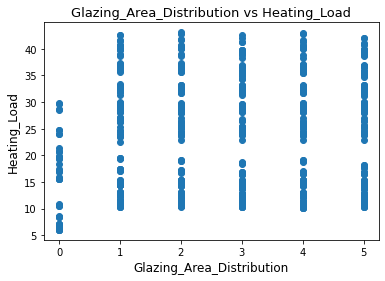

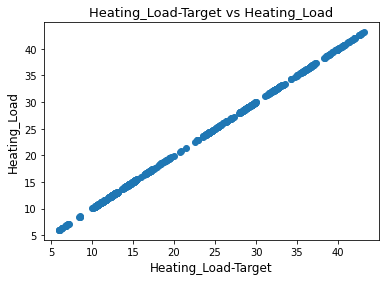

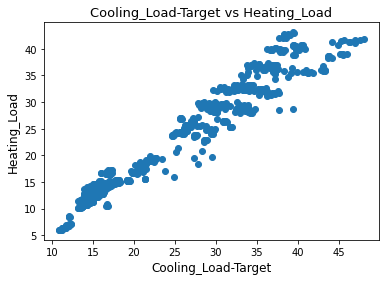

In [34]:
# Feature vs Target 1

target_h = df['Heating_Load-Target']
for i in list(df.columns):
  plt.title('{} vs Heating_Load'.format(i), size=13)
  plt.xlabel(i, size=12)
  plt.ylabel('Heating_Load', size=12)
  plt.scatter(df[i], target_h)
  plt.show()

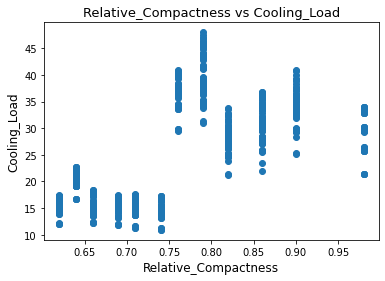

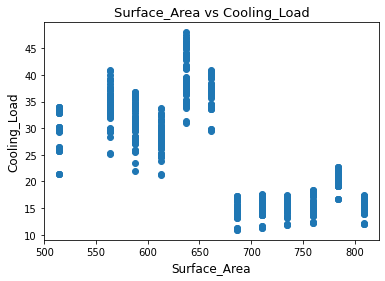

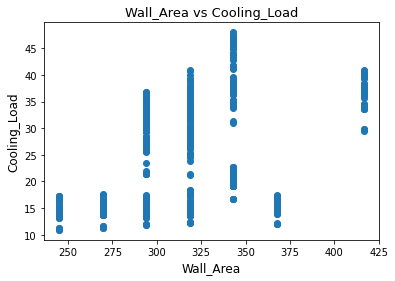

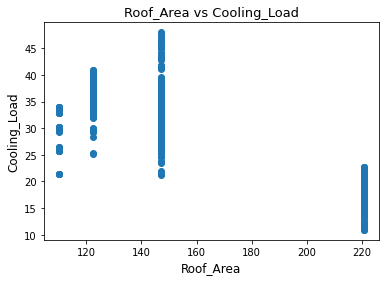

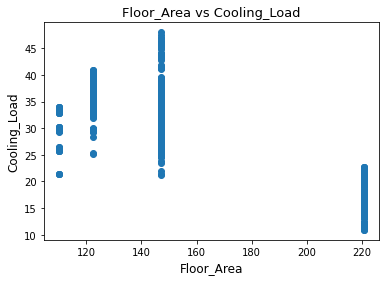

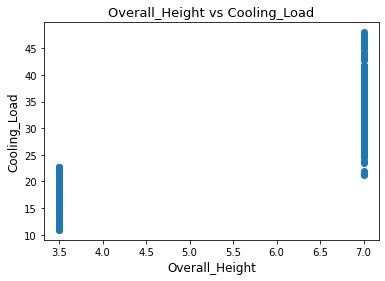

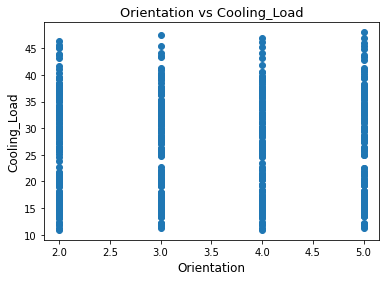

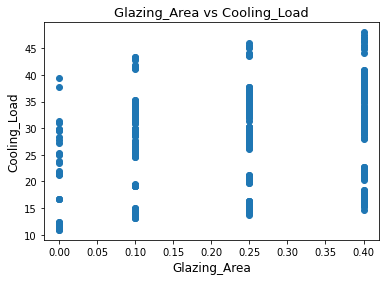

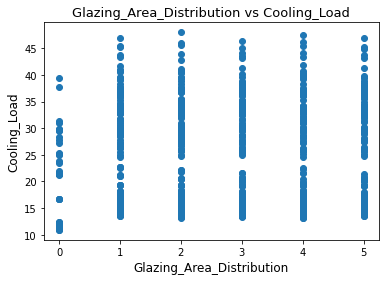

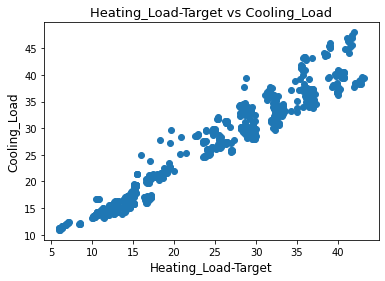

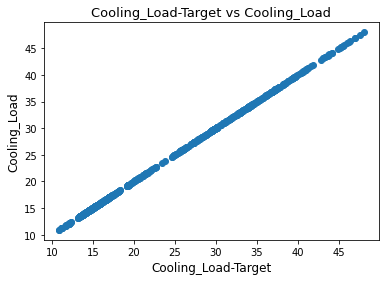

In [35]:
# Feature vs Target 2

target_c = df[['Cooling_Load-Target']]
for i in list(df.columns):
  plt.title('{} vs Cooling_Load'.format(i), size=13)
  plt.xlabel(i, size=12)
  plt.ylabel('Cooling_Load', size=12)
  plt.scatter(df[i], target_c)
  plt.show()

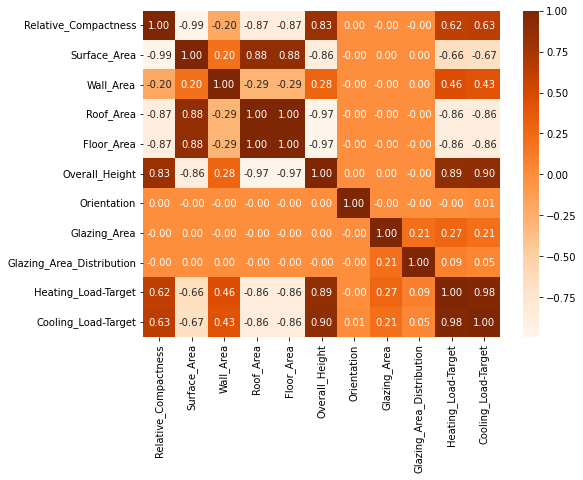

In [36]:
# Heat map of Correlation matrix

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Oranges')
plt.show()

**Insights from Exploratory Data Analysis**
* Relative Compactness and Surface Area are inversely proportinal. Since *Wall_Area(WA), Floor_Area(FA), and Roof_Area(RA) are related to Surface Area(SA), Relative Compactness is inversely proportional to RA, WA, FA also.*
* The dependent variables **Heating_Load** & **Cooling_Load** itself are directly proportional to each other. Therefore, futher investigation is required whether either of them can be dropped for **Linear Regression.**

### **Model**

In [37]:
def algorithm(data):

  # creating variables to store feature importances obtained from various algorithms
  
  # variables for feature importance
  global fi_lr
  global fi_rf

  # variables for storing predicted values
  global rf_y_pred
  global lr_y_pred

  global imp

  # creating a list of algorithms
  algos = ['lr','rf']

  for i in algos:
    if i == 'lr':
      
      # initializing the model
      lr = LinearRegression()

      # dropping features to ensure multicollinearity among independent features
      # data = data.drop(['Wall_Area','Roof_Area','Floor_Area'], axis=1)

      # splitting the dataset into dependent and independent features
      x = data.drop(['Heating_Load-Target','Cooling_Load-Target'], axis=1)
      y = data[['Heating_Load-Target','Cooling_Load-Target']]

      # splitting the independent features into training set and testing set
      x_tr, x_tt, y_tr, y_tt = train_test_split(x, y, test_size=0.2, random_state=11)
      lr.fit(x_tr, y_tr)
      lr_y_pred = lr.predict(x_tt)

      test_score = round(lr.score(x_tt, y_tt),3)
      train_score = round(lr.score(x_tr, y_tr),3)
      print('LinearRegression - ')
      print('Test score - {}'.format(test_score))
      print('Train score - {}'.format(train_score))
      
      fi_lr = pd.DataFrame([pd.Series(lr.feature_names_in_), pd.Series(lr.coef_[0])]).transpose()
      fi_lr.columns=['Features', 'Importance: LinReg']
  else:
    # initializing the model
    rf = RandomForestRegressor(max_depth=6)

    # splitting the dataset into dependent and independent features
    x = df.drop(['Heating_Load-Target','Cooling_Load-Target'], axis=1)
    y = df[['Heating_Load-Target','Cooling_Load-Target']]

    # splitting the independent features into training set and testing set
    x_tr, x_tt, y_tr, y_tt = train_test_split(x, y, test_size=0.2, random_state=11)

    rf.fit(x_tr, y_tr)
    rf_y_pred = rf.predict(x_tt)
    
    test_score = round(rf.score(x_tt, y_tt),3)
    train_score = round(rf.score(x_tr, y_tr),3)
    print()
    print('RandomForestRegression - ')
    print('Test score - {}'.format(test_score))
    print('Train score - {}'.format(train_score))

    fi_rf = pd.DataFrame([df.columns, pd.Series(rf.feature_importances_)]).transpose()
    fi_rf.columns = ['Features', 'Importance: RFReg']
    fi_rf = fi_rf.iloc[:9,:]
  
  print()
  # creating a dataframe of the feature importance values obtained from both algorithms
  imp = pd.merge(fi_lr, fi_rf, how = 'outer')
  print('\n',imp)

algorithm(df)

LinearRegression - 
Test score - 0.904
Train score - 0.901

RandomForestRegression - 
Test score - 0.981
Train score - 0.986


                     Features   Importance: LinReg Importance: RFReg
0       Relative_Compactness           -63.373678          0.233736
1               Surface_Area  352961379145.072144          0.155478
2                  Wall_Area -352961379145.096313          0.032555
3                  Roof_Area -352331639973.300842          0.074921
4                 Floor_Area -353591118317.016235          0.113775
5             Overall_Height             4.136604          0.314756
6                Orientation              0.01267          0.001246
7               Glazing_Area            19.886007           0.06423
8  Glazing_Area_Distribution             0.185434          0.009303
